In [1]:
import scanpy as sc 
import metashells as ms
from metashells.simulation import create_simulated_adata

In [2]:
adata_with_labels_file = '/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/scANVI_v2.h5ad'
adata = sc.read_h5ad(adata_with_labels_file)

/ocean/projects/cis240075p/asachan/.conda/envs/metasheller-py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata.X = adata.layers['log1p_norm_cb']
adata.X.min(), adata.X.max()

(np.float32(0.0), np.float32(5.7404833))

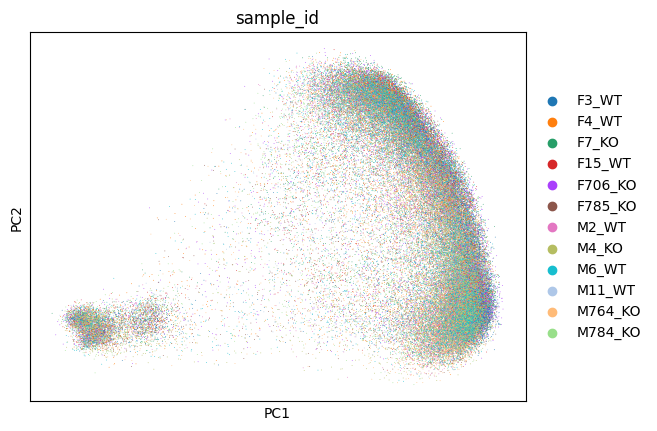

In [4]:
sc.tl.pca(adata)
sc.pl.pca(adata, color='sample_id')

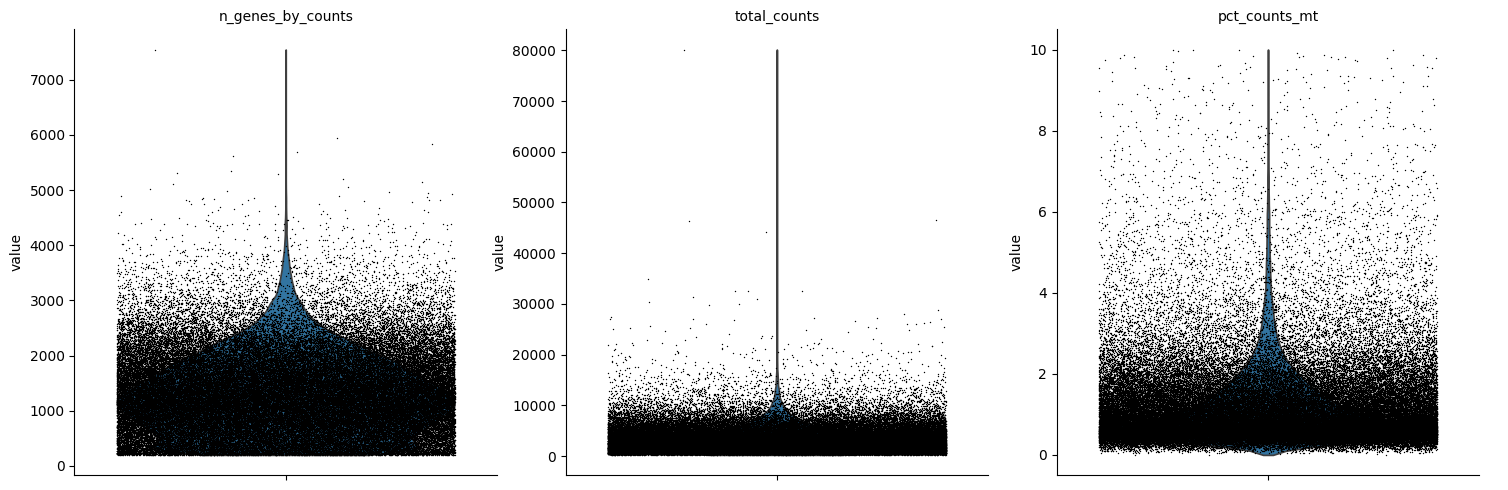

In [5]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)


In [6]:
# Filter out cells with high mitochondrial gene percentage
adata = adata[adata.obs['pct_counts_mt'] < 5]
adata

View of AnnData object with n_obs × n_vars = 86672 × 4000
    obs: 'sample_id', 'cell_type', 'condition', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_mt_cb', 'log1p_total_counts_mt_cb', 'pct_counts_mt_cb', 'total_counts_ribo_cb', 'log1p_total_counts_ribo_cb', 'pct_counts_ribo_cb', 'total_counts_hb_cb', 'log1p_total_counts_hb_cb', 'pct_counts_hb_cb', 'n_genes', 'sex', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'hb', 'ribo', 'mt', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'condi

#### Subset to cell type of interest

In [7]:
adata_sex = adata[adata.obs['sex'] == 'F']
adata_cell_type = adata_sex[adata_sex.obs['C_scANVI'] == 'Fast IIB']
adata_cell_type

View of AnnData object with n_obs × n_vars = 16018 × 4000
    obs: 'sample_id', 'cell_type', 'condition', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_mt_cb', 'log1p_total_counts_mt_cb', 'pct_counts_mt_cb', 'total_counts_ribo_cb', 'log1p_total_counts_ribo_cb', 'pct_counts_ribo_cb', 'total_counts_hb_cb', 'log1p_total_counts_hb_cb', 'pct_counts_hb_cb', 'n_genes', 'sex', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'hb', 'ribo', 'mt', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'condi

In [8]:
adata_cell_type.obs['sample_id'].value_counts()

sample_id
F15_WT     3773
F7_KO      3712
F706_KO    2557
F3_WT      2292
F4_WT      2004
F785_KO    1680
Name: count, dtype: int64

# Run SeaCells

In [9]:
import os 

results_dir = './meta_cell_outputs'
os.makedirs(results_dir, exist_ok=True)

In [ ]:
from metashells.seashells import SeaShells 

# to parallelize, simply submit multiple jobs running the following code

conch = SeaShells(
    adata_full = adata_cell_type, 
    results_dir = results_dir,
    cells_per_metacell = 75, # recommended is 75 but can go as low as ~20 if really needed
    sample_col = 'sample_id'
)
conch.run()

/ocean/projects/cis240075p/asachan/.conda/envs/metasheller-py311/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:384: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = x_pca


Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/3712 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/3712 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/3712 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 44 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 15/15 [00:00<00:00, 138.07it/s]

Selecting 5 cells from greedy initialization.


Randomly initialized A matrix.
Setting convergence threshold at 0.00111
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 28 iterations.


# Prep adata from metacells

In [16]:
gex_df = adata_cell_type.to_df(layer='log1p_norm_cb')
gex_df.head(3)

,Xkr4,Gm1992,Rp1,Sox17,Rgs20,Alkal1,St18,Sntg1,2610203C22Rik,Cpa6,...,Tlr8,Tlr7,Frmpd4,Arhgap6,Gm15261,Gm15246,Mid1,Uty,Gm47283,Tmlhe
AAACCCACACTCATAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.005178,0.000000,0.0,0.000000,0.0,0.000000,0.000000
AAACCCATCAGCCTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.994585,0.994585,0.0,0.000000,0.0,0.000000,0.000000
AAACGAAAGGGCCTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.350311,0.000000,0.0,0.609232,0.0,1.370308,0.350311


In [17]:
from glob import glob
import pandas as pd

files = glob(results_dir + '/*.csv')
gex_df['SEACell'] = 'NA'
gex_df

for f in files:
    seacells = pd.read_csv(f, index_col=0)
    seacells = seacells['SEACell'].astype(str) + '_' + os.path.basename(f).split('.')[0]
    gex_df.loc[seacells.index, 'SEACell'] = seacells

gex_df = gex_df.groupby('SEACell').mean()

In [18]:
display(gex_df)

,Xkr4,Gm1992,Rp1,Sox17,Rgs20,Alkal1,St18,Sntg1,2610203C22Rik,Cpa6,...,Tlr8,Tlr7,Frmpd4,Arhgap6,Gm15261,Gm15246,Mid1,Uty,Gm47283,Tmlhe
SEACell,,,,,,,,,,,,,,,,,,,,,
0_F15_WT,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.040670,0.000000,...,0.0,0.000000,0.000000,0.975650,0.205820,0.020061,0.252605,0.000000,0.537429,0.144679
0_F3_WT,0.000277,0.0,0.000000,0.0,0.001375,0.000307,0.000410,0.000804,0.011047,0.000000,...,0.0,0.000326,0.000841,0.954650,0.052342,0.005443,0.117752,0.007405,0.556557,0.143323
0_F4_WT,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.976974,0.056067,0.006460,0.055888,0.000000,0.338220,0.082593
0_F706_KO,0.000159,0.0,0.000164,0.0,0.002947,0.000309,0.000000,0.002463,0.015450,0.000206,...,0.0,0.000000,0.000931,0.844037,0.055830,0.008748,0.120583,0.004202,0.287184,0.163739
0_F785_KO,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.005950,0.023157,0.000000,...,0.0,0.000000,0.010709,1.216046,0.054224,0.000000,0.105040,0.000000,0.403584,0.174580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_F3_WT,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.005101,0.000000,0.004776,0.000000,...,0.0,0.000000,0.000000,1.093114,0.047788,0.015069,0.194611,0.000000,0.538639,0.105478
9_F4_WT,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.017357,0.838672,0.018926,0.000000,0.181442,0.000000,0.537281,0.154245
9_F706_KO,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.028604,0.000000,...,0.0,0.000000,0.000000,1.064558,0.054839,0.000000,0.168026,0.000000,0.233710,0.161938


In [19]:
y = [0 if 'WT' in i else 1 for i in gex_df.index]

In [20]:
adata = sc.AnnData(
    X = gex_df.values,
    var = pd.DataFrame(index=gex_df.columns),
    obs = pd.DataFrame(y, columns=['y'], index=gex_df.index)
)
adata

AnnData object with n_obs × n_vars = 213 × 4000
    obs: 'y'

In [21]:
adata.write_h5ad(f'/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/seacells_F_FastIIB.h5ad')